In [1]:
from spectacle import *

Manim Community v0.14.0

Welcome to spectacle


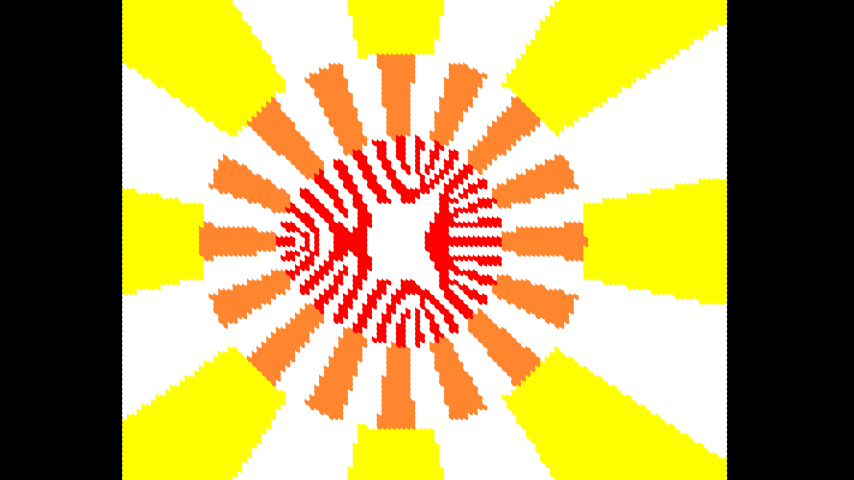

In [6]:
%%manim -v WARNING -ql SpaceTime

import cmath

class SpaceTime(Scene):
    def construct(self):
        bounds = 5
        dx = 0.08
        
        
        
        def mandel(c):
            f = 0
            for lim in range(len(RAINBOW)):
                f = f**2 + c
                if abs(f) > 10000:
                    break
            return f, lim
        
        points = []
        for x in np.arange(-bounds,bounds,dx):
            for y in np.arange(-bounds,bounds,dx):
                f, lim = mandel(x + y*1j)
                color = {True: WHITE}.get(f<0.001, RAINBOW[lim])
                points.append(Dot(point=np.array([x,y,0]), color=color,radius=dx))
        
        # def transform(p):
        #     z = p[0]+p[1]*1j
            
        #     z_out = mandel(z)
        #     return point(z_out.real, z_out.imag)
        
        # self.play(grid.animate.apply_function(transform),run_time=10)
        # self.wait()
        self.add(*points)
        

In [33]:

%%manim -v WARNING -ql SpaceTime

import cmath

class SpaceTime(Scene):
    def construct(self):
        self.add(Square(
            side_length=8,
            color=TEAL
        ))
        
        def field(p):
            x_diff = 2
            p1 = point(p[0]-x_diff,p[1])
            x1, y1 = p1[0], p1[1]
            r1 = np.linalg.norm(p1)
            if r1 < 0.000001:
                return point(0,0)
        
            p2 = point(p[0]+x_diff,p[1])
            x2, y2 = p2[0], p2[1]
            r2 = np.linalg.norm(p2)
            if r2 < 0.000001:
                return point(0,0)
            
            
            return point((x1/r1)-(x2/r2), (y1/r1)-(y2/r2))
        
        stream_lines = StreamLines(field, stroke_width=3)
        self.add(stream_lines)
        
        dot = Dot().move_to(point(1.5, 1.5))
        
        dot.add_updater(stream_lines.get_nudge_updater())
        
        self.add(dot)
        
        stream_lines.start_animation(warm_up=False, flow_speed=1.5)
        self.wait(2*stream_lines.virtual_time / stream_lines.flow_speed)
        
        


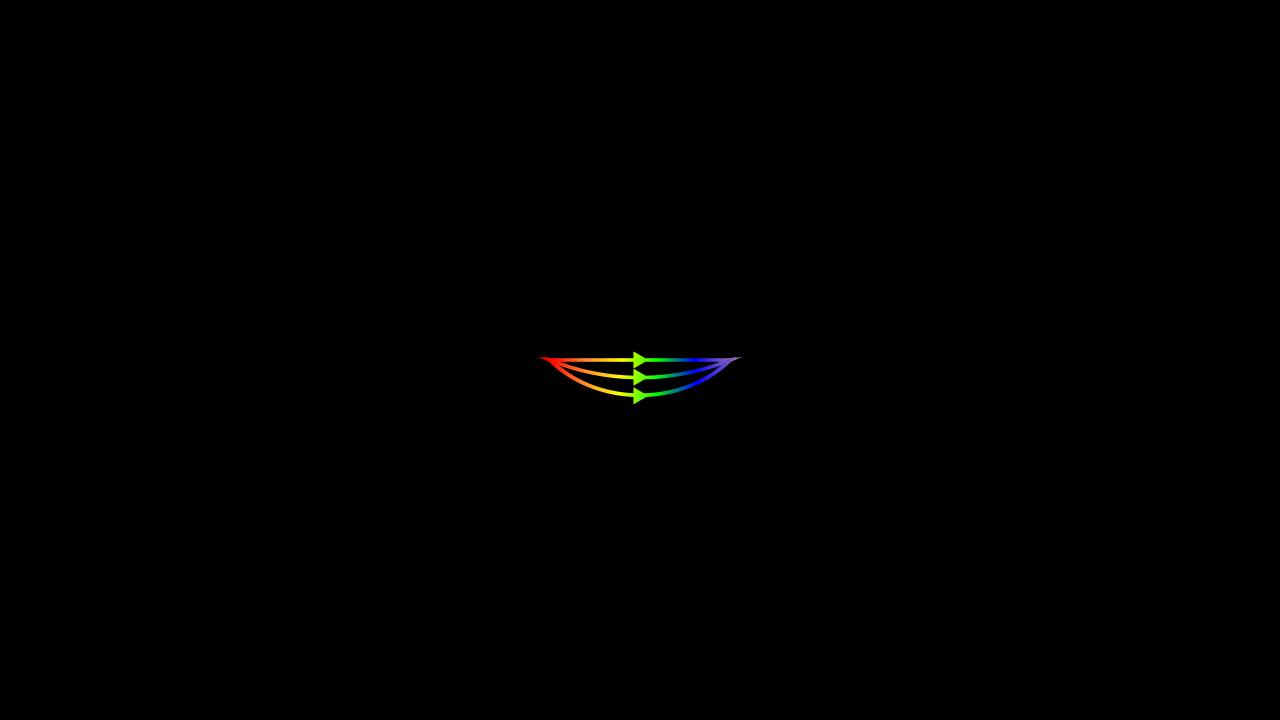

In [68]:
%%manim -v WARNING -qm SpaceTime

class SpaceTime(Scene):
    def construct(self):
        
        self.add(*[_Fermion(angle=n).set_color_by_gradient(RAINBOW) for n in [0, PI/4, PI/2]])
        


class _Fermion(VGroup):
    def __init__(
        self,
        start: np.ndarray = LEFT,
        end=RIGHT,
        angle=0,
        stroke=0.01,
        color=WHITE,
        label="",
        label_color=WHITE,
        **kwargs,
    ):
        self.rad = stroke/2
        self.line = Line(start=start, end=end, color=color, **kwargs)
        self.arc = ArcBetweenPoints(start,end,angle=angle)
        linear_angle = self.line.get_angle()
        perp = point(-np.sin(linear_angle),np.cos(linear_angle))
        normal = self.rad * perp/np.linalg.norm(perp)
        
        def transform_arc(p):
            x, y = p[0], p[1]
            new_p = self.arc.point_from_proportion(x)
            vec_to_center = new_p-self.arc.get_center()
            return new_p+y*((1-2*angle/PI)*normal+(2*angle/PI)*vec_to_center)        
        
        self.body = Polygon(
            point(0,-self.rad),
            point(0,self.rad),
            point(1,self.rad),
            point(1,-self.rad),
            color=color,fill_opacity=1
            ).apply_function(transform_arc)
        
        vec_to_center = self.arc.point_from_proportion(0.5)-self.line.get_midpoint()
        actual_arc_midpoint = self.arc.point_from_proportion(0.5)-vec_to_center*stroke*4
        
        self.midarrow_tip = (
            Triangle(color=color,fill_opacity=1)
            .move_to(actual_arc_midpoint)
            .scale(0.035 * self.line.get_length())
            .rotate(angle_of_vector(self.line.get_vector()) - PI / 2)
        )
        self.union = Union(
            self.body,
            self.midarrow_tip,
            color=color,
            fill_opacity=1
            )
        # self.union = self.body
        

        vmobjects = [self.union]

        if not (label == ""):
            vmobjects.append(
                # label.move_to(actual_arc_midpoint)
                MidpointNormalLabel(label, line=self.line, color=label_color, **kwargs)
            )

        super().__init__(*vmobjects, **kwargs)


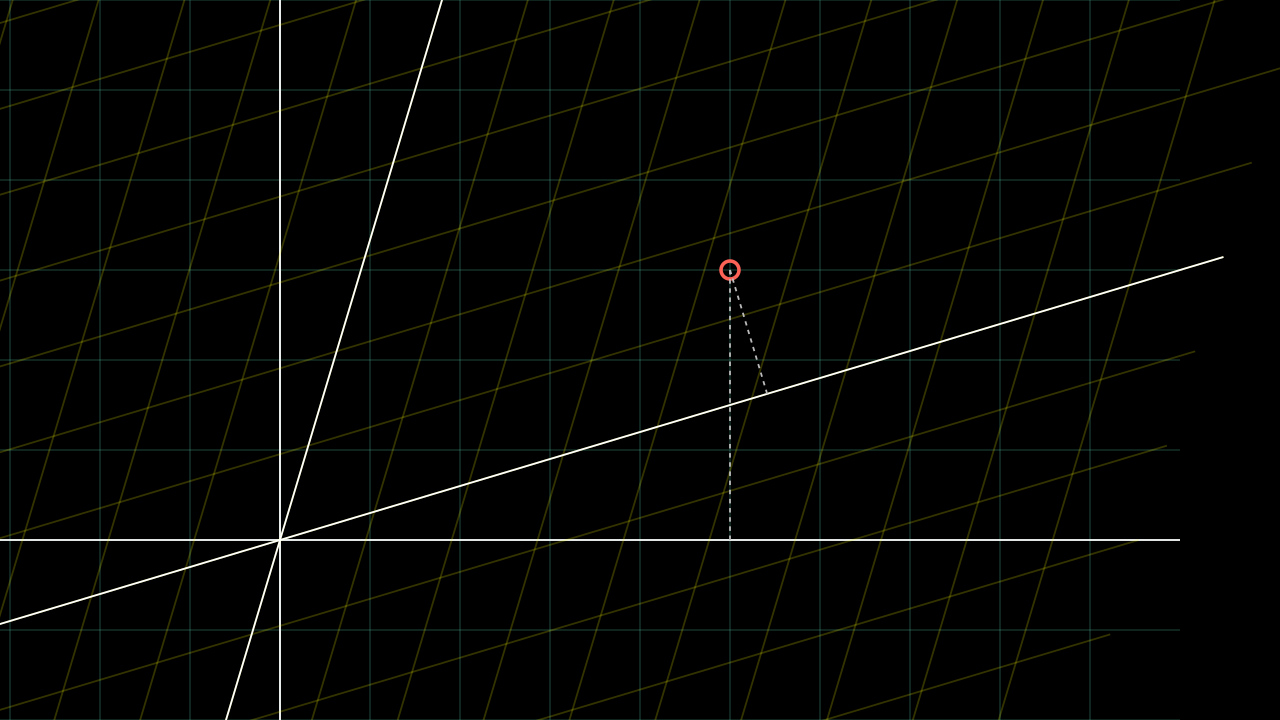

In [70]:
%%manim -v WARNING --disable_caching -qm SpaceTime

class SpaceTime(Scene):
    def construct(self):
        boundary = 10
        limits = [-boundary, boundary, 1]
        
        def lorentz(p, v):
            t = p[0]
            x = p[1]
            gamma = 1/np.sqrt(1-(v**2))
            return point(
                gamma*(t-v*x),
                gamma*(x-v*t),
            )
        
        
        
        
        base_grid = NumberPlane(x_range=limits,y_range=limits, background_line_style={'stroke_color':TEAL, 'stroke_opacity': 0.2})
        shifted_grid = NumberPlane(x_range=limits,y_range=limits, background_line_style={'stroke_color':YELLOW, 'stroke_opacity': 0.2})
        shifted_grid.prepare_for_nonlinear_transform()
        shifted_grid.apply_function(lambda p: lorentz(p,-0.3))
        event = Circle(0.1).shift(RIGHT*5+UP*3)
        
        base_line = base_grid.get_line_from_axis_to_point(0,event.get_center())
        
        
        shift_line = shifted_grid.get_line_from_axis_to_point(0,event.get_center())
        
        
        objects = [base_grid,shifted_grid, event, base_line, shift_line]
        
        for n in objects: n.shift(LEFT*4+DOWN*2)
        
        self.add(*objects)

        

In [126]:
%%manim -v WARNING -qm SpaceTime

import random

class SpaceTime(Scene):
    def construct(self):
        boundary = 5
        limits = [-boundary, boundary, 0.5]
        
        def r(p):
            return np.linalg.norm(p)
        
        def th(p):
            x, y = p[0], p[1]
            return np.angle(x+y*1j)
        
        def src(p):
            x, y = p[0], p[1]
            if r(p) == 0:
                return point(0.0,0.0)
            else:
                return (1-y)*UP
        
        def vec_func(p):
            x, y = p[0], p[1]
            return src(point(x-3,y))+src(point(x+3,y))
        
        vector_field = ArrowVectorField(
            vec_func, x_range=limits, y_range=limits
        )
        
        self.add(vector_field)
        
        circle = Circle(radius=2)
        circle.add_updater(vector_field.get_nudge_updater(pointwise=True))
        self.add(circle)
        self.wait(8)
        
        
        
        